# Summary

 - Accuracy too low (at most 80%)
 - CatBoost overall best regressor for the data

# Data Processing and EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from datetime import timedelta

In [2]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 20

In [3]:
CUTOFF_TRAIN = '2018-07-15'  # ~80%
CUTOFF_TRAINVAL = '2018-10-01' # ~ 80%

df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df['Sneaker Name'] = df['Brand'] + ' - ' + df['Sneaker Name']
df['DaysStored'] = pd.Series(df['Order Date'] - df['Release Date']).apply(lambda x: x.days)
df = df[['Order Date', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
df

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,1097.0,342
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,685.0,282
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,690.0,282
3,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,1075.0,282
4,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,828.0,202
...,...,...,...,...,...
99951,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.0,565.0,49
99952,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.5,598.0,49
99953,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,5.5,605.0,49
99954,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,11.0,650.0,49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Sneaker Name  99956 non-null  object        
 2   Shoe Size     99956 non-null  float64       
 3   Sale Price    99956 non-null  float64       
 4   DaysStored    99956 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.8+ MB


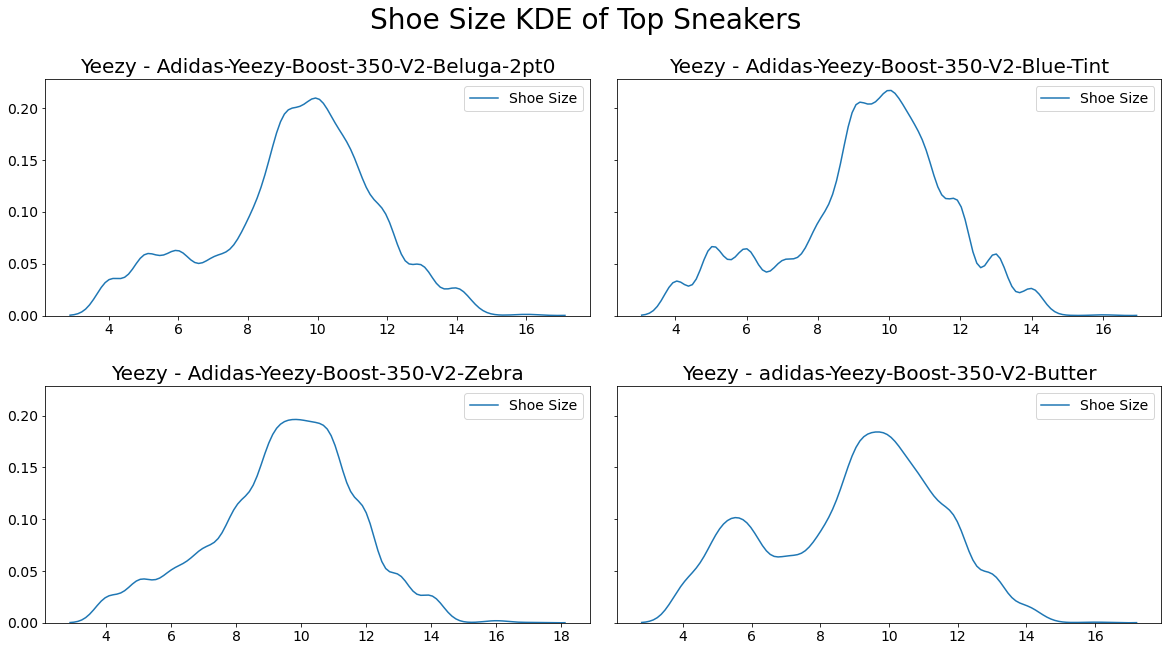

In [5]:
top_sneakers = df.groupby(['Sneaker Name', 'Shoe Size']).size().reset_index().nlargest(9, 0)['Sneaker Name'].to_list()
top_sneakers = sorted(list(set(top_sneakers)))

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharey = True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Shoe Size KDE of Top Sneakers')

x, y = 0, 0
for i in range(0, len(top_sneakers)):
    x, y = int(i/2), i % 2
    sns.kdeplot(data=df[df['Sneaker Name']==top_sneakers[i]]['Shoe Size'], ax=ax[x][y])
    ax[x][y].set_title(top_sneakers[i].strip(), fontsize=20)

In [6]:
df_agg = df[(df['Sneaker Name']==' Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint') & \
            (df['Shoe Size'].isin([9, 10, 11]))].copy()
df_agg = df_agg.groupby(['Order Date', 'Sneaker Name', 'Shoe Size']).mean().reset_index()
df_agg

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,550.000000,-6
1,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,523.333333,-6
2,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,485.000000,-5
3,2017-12-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,475.000000,-4
4,2017-12-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11.0,456.000000,-4
...,...,...,...,...,...
955,2019-02-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,360.500000,422
956,2019-02-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10.0,381.000000,422
957,2019-02-12,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,367.000000,423
958,2019-02-13,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9.0,375.000000,424


In [7]:
start_dt = df_agg['Order Date'].min()
end_dt = df_agg['Order Date'].max()

df_cal = pd.DataFrame({'dt': pd.date_range(start_dt, end_dt)})
df_cal['dt_str'] = df_cal['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_cal['lst_lb15'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(15 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb30'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(30 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb60'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(60 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb120'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(120 - 1)).strftime('%Y-%m-%d').to_list())

df_cal['lbl15_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(15 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl30_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(30 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl60_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(60 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl120_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(120 - 1)).strftime('%Y-%m-%d'))

df_cal['lb15_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(22)).strftime('%Y-%m-%d'))
df_cal['lb30_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(37)).strftime('%Y-%m-%d'))
df_cal['lb60_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(67)).strftime('%Y-%m-%d'))
df_cal['lb120_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(127)).strftime('%Y-%m-%d'))

print(df_cal.shape, df_cal.columns)
df_cal.head(5)

(431, 14) Index(['dt', 'dt_str', 'lst_lb15', 'lst_lb30', 'lst_lb60', 'lst_lb120',
       'lbl15_last', 'lbl30_last', 'lbl60_last', 'lbl120_last', 'lb15_plus7',
       'lb30_plus7', 'lb60_plus7', 'lb120_plus7'],
      dtype='object')


,dt,dt_str,lst_lb15,lst_lb30,lst_lb60,lst_lb120,lbl15_last,lbl30_last,lbl60_last,lbl120_last,lb15_plus7,lb30_plus7,lb60_plus7,lb120_plus7
0,2017-12-10,2017-12-10,"[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...","[2017-12-10, 2017-12-11, 2017-12-12, 2017-12-1...",2017-12-24,2018-01-08,2018-02-07,2018-04-08,2018-01-01,2018-01-16,2018-02-15,2018-04-16
1,2017-12-11,2017-12-11,"[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...","[2017-12-11, 2017-12-12, 2017-12-13, 2017-12-1...",2017-12-25,2018-01-09,2018-02-08,2018-04-09,2018-01-02,2018-01-17,2018-02-16,2018-04-17
2,2017-12-12,2017-12-12,"[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...","[2017-12-12, 2017-12-13, 2017-12-14, 2017-12-1...",2017-12-26,2018-01-10,2018-02-09,2018-04-10,2018-01-03,2018-01-18,2018-02-17,2018-04-18
3,2017-12-13,2017-12-13,"[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...","[2017-12-13, 2017-12-14, 2017-12-15, 2017-12-1...",2017-12-27,2018-01-11,2018-02-10,2018-04-11,2018-01-04,2018-01-19,2018-02-18,2018-04-19
4,2017-12-14,2017-12-14,"[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...","[2017-12-14, 2017-12-15, 2017-12-16, 2017-12-1...",2017-12-28,2018-01-12,2018-02-11,2018-04-12,2018-01-05,2018-01-20,2018-02-19,2018-04-20


In [8]:
df_tmp = df_cal[['dt', 'dt_str']].copy()
df_tmp['key'] = 0
print('df_tmp.shape', df_tmp.shape)

df_tmp = df_tmp.merge(pd.DataFrame({'key': [0], 'Sneaker Name': [' Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint']}), how='outer')
df_tmp = df_tmp.merge(pd.DataFrame({'key': [0, 0, 0], 'Shoe Size': [9, 10, 11]}), how='outer')
df_tmp = df_tmp.merge(df_agg, how='left', left_on=['dt', 'Sneaker Name', 'Shoe Size'], right_on=['Order Date', 'Sneaker Name', 'Shoe Size'])
df_tmp = df_tmp[['dt_str', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
print('df_tmp.shape', df_tmp.shape)
df_tmp.head(5)

df_tmp.shape (431, 3)
df_tmp.shape (1293, 5)


,dt_str,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,550.000000,-6.0
1,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN
2,2017-12-10,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,11,523.333333,-6.0
3,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,9,NaN,NaN
4,2017-12-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint,10,NaN,NaN


In [9]:
pvt_price = df_tmp[['dt_str', 'Shoe Size', 'Sale Price']].copy()
pvt_price = pvt_price.pivot(index='Shoe Size', columns='dt_str', values='Sale Price')
pvt_price = pvt_price.interpolate(method='pad', axis=0, limit_direction='forward')
print('pvt_price.shape', pvt_price.shape)

pvt_price_diff = pvt_price.diff(axis=1)
pvt_price_diff = pvt_price_diff.reset_index()
pvt_price = pvt_price.reset_index()
print(pvt_price['Shoe Size'])

pvt_store = df_tmp[['dt_str', 'Shoe Size', 'DaysStored']].copy()
pvt_store = pvt_store.pivot(index='Shoe Size', columns='dt_str', values='DaysStored')
pvt_store = pvt_store.interpolate(method='linear', axis=0, limit_direction='both')
pvt_store = pvt_store.interpolate(method='linear', axis=1, limit_direction='both')  # fill remaining nulls
print('pvt_store.shape', pvt_store.shape)
pvt_store = pvt_store.reset_index()
print(pvt_store['Shoe Size'])

pvt_price.shape (3, 431)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64
pvt_store.shape (3, 431)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64


In [10]:
df_results = pd.DataFrame({'scenario': pd.Series([], dtype=str),
                           'model': pd.Series([], dtype=str),
                           'MAE': pd.Series([], dtype=np.half),
                           'MSE': pd.Series([], dtype=np.half),
                           'RMSE': pd.Series([], dtype=np.half),
                           'R2': pd.Series([], dtype=np.half),
                           'RMSLE': pd.Series([], dtype=np.half),
                           'MAPE': pd.Series([], dtype=np.half)})
df_results

,scenario,model,MAE,MSE,RMSE,R2,RMSLE,MAPE


# Regression

In [11]:
import pycaret.regression as py15
import pycaret.regression as py30
import pycaret.regression as py60
import pycaret.regression as py120
import pycaret.regression as py240

## Models List

In [12]:
py15.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


## Price (As Is)

### 15-day Lookbehind

In [150]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
# train_win15['store'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
# store15 = pd.concat(train_win15['store'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

# train_win15 = pd.concat([label15, target15, store15, feature15], axis=1)
train_win15 = pd.concat([label15, target15, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(819, 19) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12,
                   13,             14,             15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,339.538462,550.000000,550.0,475.0,450.000000,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000
1,0,1,0,353.888889,NaN,NaN,NaN,448.500000,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000
2,0,0,1,366.714286,523.333333,485.0,456.0,461.000000,415.428571,377.000000,391.500000,393.000000,394.888889,393.909091,388.363636,382.800000,376.357143,378.133333,380.400000
0,1,0,0,337.428571,550.000000,475.0,450.0,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000,352.833333
1,0,1,0,351.812500,NaN,NaN,448.5,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000,379.750000


In [151]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(819, 19)"
4,Missing Values,True
5,Numeric Features,18
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [152]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,6.9113,81.0925,8.9077,0.7495,0.0236,0.0184,0.1474
1,CatBoost Regressor,7.1731,85.3113,9.1417,0.7362,0.0242,0.0191,2.4204
2,Random Forest,7.1866,87.2182,9.2636,0.7310,0.0245,0.0191,0.2611
3,Gradient Boosting Regressor,7.2760,90.4283,9.4329,0.7214,0.0249,0.0193,0.1810
4,Least Angle Regression,7.3629,91.7582,9.5017,0.7164,0.0251,0.0196,0.0088
5,Linear Regression,7.3629,91.7582,9.5017,0.7164,0.0251,0.0196,0.0038
6,Ridge Regression,7.3614,91.7500,9.5011,0.7164,0.0251,0.0196,0.0044
7,TheilSen Regressor,7.4237,92.7417,9.5573,0.7137,0.0253,0.0197,0.9263
8,Bayesian Ridge,7.4090,94.7137,9.6471,0.7079,0.0255,0.0197,0.0040
9,Lasso Regression,7.4053,95.0247,9.6603,0.7068,0.0255,0.0197,0.0044


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [87]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,6.9113,81.0925,8.9077,0.7495,0.0236,0.0184,0.2137
1,CatBoost Regressor,7.1731,85.3113,9.1417,0.7362,0.0242,0.0191,3.3221
2,Random Forest,7.1866,87.2182,9.2636,0.7310,0.0245,0.0191,0.2716
3,Gradient Boosting Regressor,7.2760,90.4283,9.4329,0.7214,0.0249,0.0193,0.1953
4,Ridge Regression,7.3614,91.7500,9.5011,0.7164,0.0251,0.0196,0.0035
5,Linear Regression,7.3629,91.7582,9.5017,0.7164,0.0251,0.0196,0.0033
6,Least Angle Regression,7.3629,91.7582,9.5017,0.7164,0.0251,0.0196,0.0059
7,TheilSen Regressor,7.4237,92.7417,9.5573,0.7137,0.0253,0.0197,1.1278
8,Bayesian Ridge,7.4090,94.7137,9.6471,0.7079,0.0255,0.0197,0.0059
9,Lasso Regression,7.4053,95.0247,9.6603,0.7068,0.0255,0.0197,0.0044


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

#### RMSE 8.9077, R2 0.7495 - Extra Trees

In [88]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.1816,125.2403,11.1911,0.6203,0.0294,0.0217
1,7.1125,92.1022,9.5970,0.7515,0.0258,0.0190
2,6.0975,60.1324,7.7545,0.8611,0.0205,0.0162
3,5.6884,53.5178,7.3156,0.8049,0.0193,0.0151
4,6.9591,79.7021,8.9276,0.7910,0.0236,0.0185
5,6.3048,59.1923,7.6937,0.8401,0.0205,0.0168
6,6.8514,79.4302,8.9124,0.7138,0.0237,0.0181
7,8.9214,119.6735,10.9395,0.5457,0.0285,0.0234
8,6.1155,55.4272,7.4449,0.8569,0.0197,0.0163
9,6.8812,86.5069,9.3009,0.7099,0.0246,0.0184


In [89]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2114,127.4831,11.2908,0.6135,0.0296,0.0218
1,7.0598,90.2736,9.5012,0.7565,0.0255,0.0189
2,6.0931,56.2080,7.4972,0.8702,0.0198,0.0163
3,5.9930,59.0919,7.6871,0.7846,0.0202,0.0159
4,6.8662,78.3786,8.8532,0.7944,0.0235,0.0182
5,6.8070,67.4758,8.2144,0.8178,0.0220,0.0182
6,7.1285,83.3412,9.1291,0.6997,0.0242,0.0188
7,8.8092,109.8182,10.4794,0.5831,0.0274,0.0232
8,6.2850,57.1362,7.5589,0.8525,0.0200,0.0168
9,7.0497,85.8068,9.2632,0.7122,0.0245,0.0189


#### RMSE 9.1417, R2 0.7362 - CatBoost

In [90]:
cb15 = py15.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3121,124.9272,11.1771,0.6212,0.0292,0.0220
1,7.6771,107.5625,10.3712,0.7098,0.0280,0.0206
2,6.6014,64.2872,8.0179,0.8515,0.0212,0.0176
3,6.3872,68.0606,8.2499,0.7519,0.0218,0.0169
4,7.0601,81.9783,9.0542,0.7850,0.0240,0.0187
5,6.2611,63.0375,7.9396,0.8298,0.0211,0.0167
6,7.1460,80.5429,8.9746,0.7098,0.0237,0.0189
7,9.3295,121.6771,11.0307,0.5381,0.0288,0.0245
8,5.6449,49.4383,7.0312,0.8724,0.0187,0.0151
9,7.3121,91.6018,9.5709,0.6928,0.0253,0.0196


In [91]:
tuned_cb15 = py15.tune_model(cb15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3915,130.1638,11.4089,0.6054,0.0299,0.0223
1,7.3184,105.5046,10.2715,0.7154,0.0276,0.0196
2,7.2213,73.1266,8.5514,0.8311,0.0230,0.0195
3,6.5206,70.4400,8.3929,0.7433,0.0221,0.0172
4,7.1217,83.9253,9.1611,0.7799,0.0243,0.0189
5,6.7120,70.1468,8.3754,0.8106,0.0225,0.0180
6,7.1014,86.6284,9.3074,0.6878,0.0246,0.0188
7,8.9147,112.2393,10.5943,0.5739,0.0277,0.0234
8,6.4495,60.3063,7.7657,0.8443,0.0207,0.0173
9,7.3631,93.0438,9.6459,0.6879,0.0254,0.0197


## Price (As Is), Days Stored (First Order, Predict)

### 15-day Lookbehind

In [153]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store_frd'] = train_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
train_win15['store_prd'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(train_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(train_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

train_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(819, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,339.538462,-6.0,16.0,550.000000,550.0,475.0,450.000000,...,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000
1,0,1,0,353.888889,-6.0,16.0,NaN,NaN,NaN,448.500000,...,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000
2,0,0,1,366.714286,-6.0,16.0,523.333333,485.0,456.0,461.000000,...,377.000000,391.500000,393.000000,394.888889,393.909091,388.363636,382.800000,376.357143,378.133333,380.400000
0,1,0,0,337.428571,-5.0,17.0,550.000000,475.0,450.0,392.888889,...,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000,352.833333
1,0,1,0,351.812500,-5.0,17.0,NaN,NaN,448.5,396.000000,...,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000,379.750000


In [154]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(819, 21)"
4,Missing Values,True
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [155]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.9618,61.2818,7.7497,0.8103,0.0205,0.0158,4.0440
1,Extra Trees Regressor,6.1220,63.6972,7.8960,0.8032,0.0208,0.0162,0.1780
2,Gradient Boosting Regressor,6.3197,68.3713,8.1924,0.7893,0.0216,0.0168,0.1980
3,K Neighbors Regressor,6.5778,72.8772,8.4521,0.7760,0.0223,0.0175,0.0048
4,Random Forest,6.5957,74.2113,8.5583,0.7718,0.0227,0.0175,0.2571
5,Light Gradient Boosting Machine,6.6306,76.9638,8.6737,0.7632,0.0229,0.0176,0.1757
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.1400
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0029
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0036
9,TheilSen Regressor,7.3592,92.2445,9.5323,0.7152,0.0252,0.0196,0.8469


In [22]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.9618,61.2818,7.7497,0.8103,0.0205,0.0158,3.6723
1,Extra Trees Regressor,6.1220,63.6972,7.8960,0.8032,0.0208,0.0162,0.1492
2,Gradient Boosting Regressor,6.3197,68.3713,8.1924,0.7893,0.0216,0.0168,0.2046
3,K Neighbors Regressor,6.5778,72.8772,8.4521,0.7760,0.0223,0.0175,0.0041
4,Random Forest,6.5957,74.2113,8.5583,0.7718,0.0227,0.0175,0.2556
5,Light Gradient Boosting Machine,6.6306,76.9638,8.6737,0.7632,0.0229,0.0176,0.1624
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.1357
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0039
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0042
9,TheilSen Regressor,7.3592,92.2445,9.5323,0.7152,0.0252,0.0196,0.9994


#### RMSE 7.7497, R2 0.8103 - Catboost

In [132]:
cb15 = py15.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0172,89.8302,9.4779,0.7276,0.0248,0.0186
1,6.4043,76.2379,8.7314,0.7943,0.0234,0.0171
2,5.5923,49.4238,7.0302,0.8858,0.0184,0.0148
3,5.1967,47.0308,6.8579,0.8286,0.0181,0.0138
4,5.9820,59.8603,7.7369,0.8430,0.0206,0.0159
5,5.3445,48.6508,6.9750,0.8686,0.0185,0.0142
6,6.1966,63.2871,7.9553,0.7720,0.0210,0.0164
7,8.0749,94.0363,9.6972,0.6430,0.0253,0.0212
8,4.7110,38.7805,6.2274,0.8999,0.0165,0.0126
9,6.2077,64.7837,8.0488,0.7827,0.0213,0.0166


In [133]:
tuned_cb15 = py15.tune_model(cb15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0382,93.2090,9.6545,0.7174,0.0251,0.0186
1,6.2588,73.3794,8.5662,0.8021,0.0230,0.0167
2,5.1732,43.3373,6.5831,0.8999,0.0172,0.0137
3,5.3465,46.6942,6.8333,0.8298,0.0179,0.0142
4,6.4036,61.9484,7.8707,0.8375,0.0210,0.0171
5,5.6141,49.1973,7.0141,0.8671,0.0186,0.0149
6,6.3638,66.3771,8.1472,0.7608,0.0215,0.0168
7,8.0524,93.2443,9.6563,0.6460,0.0252,0.0211
8,5.1762,47.3604,6.8819,0.8778,0.0181,0.0138
9,6.5028,69.2908,8.3241,0.7676,0.0221,0.0175


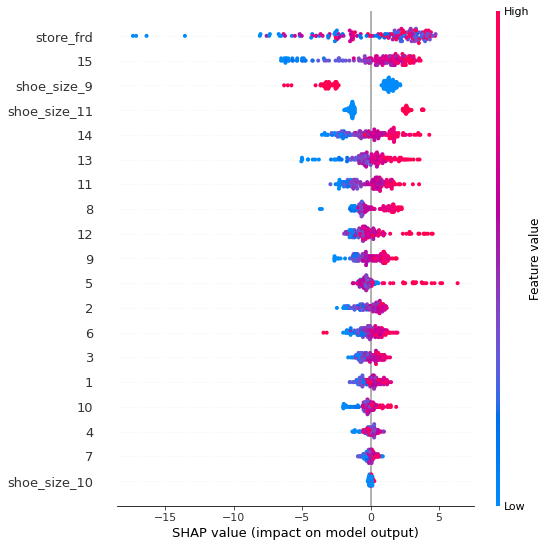

In [138]:
py15.interpret_model(cb15)

#### RMSE 7.8960, R2 0.8032 - Extra Trees

In [134]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.5170,105.6491,10.2786,0.6797,0.0268,0.0199
1,6.4562,82.5954,9.0882,0.7772,0.0245,0.0173
2,5.4529,47.9540,6.9249,0.8892,0.0181,0.0144
3,5.2165,46.7117,6.8346,0.8297,0.0180,0.0138
4,6.7567,75.5004,8.6891,0.8020,0.0230,0.0179
5,5.7086,46.2842,6.8033,0.8750,0.0181,0.0152
6,6.5498,68.5377,8.2788,0.7530,0.0219,0.0173
7,8.0885,97.8341,9.8911,0.6286,0.0257,0.0212
8,5.6171,48.2189,6.9440,0.8755,0.0185,0.0150
9,6.5378,75.9113,8.7127,0.7454,0.0230,0.0175


In [135]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6072,107.1608,10.3519,0.6751,0.0271,0.0202
1,6.5047,82.7288,9.0955,0.7768,0.0245,0.0174
2,5.5669,49.2461,7.0176,0.8862,0.0184,0.0147
3,5.3561,49.1014,7.0072,0.8210,0.0184,0.0142
4,6.4186,70.3769,8.3891,0.8154,0.0223,0.0171
5,5.7324,48.1431,6.9385,0.8700,0.0185,0.0153
6,6.4975,68.1409,8.2547,0.7545,0.0219,0.0172
7,8.3322,102.0931,10.1041,0.6124,0.0264,0.0219
8,5.7472,50.6011,7.1134,0.8694,0.0188,0.0153
9,6.8976,82.9775,9.1092,0.7217,0.0240,0.0185


## Price (As Is), Days Stored (First Order)

### 15-day Lookbehind

In [156]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store_frd'] = train_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
# train_win15['store_prd'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(train_win15['store_frd'].to_list(), axis=0)
# store15_prd = pd.concat(train_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

# train_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
train_win15 = pd.concat([label15, target15, store15_frd, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(819, 20) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,339.538462,-6.0,550.000000,550.0,475.0,450.000000,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000
1,0,1,0,353.888889,-6.0,NaN,NaN,NaN,448.500000,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000
2,0,0,1,366.714286,-6.0,523.333333,485.0,456.0,461.000000,415.428571,377.000000,391.500000,393.000000,394.888889,393.909091,388.363636,382.800000,376.357143,378.133333,380.400000
0,1,0,0,337.428571,-5.0,550.000000,475.0,450.0,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000,352.833333
1,0,1,0,351.812500,-5.0,NaN,NaN,448.5,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000,379.750000


In [157]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(819, 20)"
4,Missing Values,True
5,Numeric Features,19
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [158]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.0727,63.1921,7.8738,0.8046,0.0208,0.0161,3.2970
1,Gradient Boosting Regressor,6.3394,69.4523,8.2617,0.7865,0.0218,0.0168,0.2114
2,Extra Trees Regressor,6.3901,69.5197,8.2445,0.7855,0.0218,0.0170,0.1483
3,Random Forest,6.6212,74.5565,8.5785,0.7707,0.0227,0.0176,0.2481
4,K Neighbors Regressor,6.7780,76.7933,8.6711,0.7650,0.0229,0.0180,0.0050
5,Light Gradient Boosting Machine,6.6425,76.9977,8.6766,0.7630,0.0229,0.0176,0.2062
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.1409
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0031
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0035
9,TheilSen Regressor,7.3366,91.6932,9.5007,0.7167,0.0251,0.0195,0.9310


In [125]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.0727,63.1921,7.8738,0.8046,0.0208,0.0161,3.0115
1,Extra Trees Regressor,6.3901,69.5197,8.2445,0.7855,0.0218,0.0170,0.1447
2,Gradient Boosting Regressor,6.3394,69.4523,8.2617,0.7865,0.0218,0.0168,0.1784
3,Random Forest,6.6212,74.5565,8.5785,0.7707,0.0227,0.0176,0.2492
4,K Neighbors Regressor,6.7780,76.7933,8.6711,0.7650,0.0229,0.0180,0.0040
5,Light Gradient Boosting Machine,6.6425,76.9977,8.6766,0.7630,0.0229,0.0176,0.0963
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.0951
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0030
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0041
9,TheilSen Regressor,7.3366,91.6932,9.5007,0.7167,0.0251,0.0195,0.9298


#### RMSE 7.8738, R2 0.8046 - CatBoost

In [128]:
cb15 = py15.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0172,89.8302,9.4779,0.7276,0.0248,0.0186
1,6.4043,76.2379,8.7314,0.7943,0.0234,0.0171
2,5.5923,49.4238,7.0302,0.8858,0.0184,0.0148
3,5.1967,47.0308,6.8579,0.8286,0.0181,0.0138
4,5.9820,59.8603,7.7369,0.8430,0.0206,0.0159
5,5.3445,48.6508,6.9750,0.8686,0.0185,0.0142
6,6.1966,63.2871,7.9553,0.7720,0.0210,0.0164
7,8.0749,94.0363,9.6972,0.6430,0.0253,0.0212
8,4.7110,38.7805,6.2274,0.8999,0.0165,0.0126
9,6.2077,64.7837,8.0488,0.7827,0.0213,0.0166


In [130]:
tuned_cb15 = py15.tune_model(cb15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0382,93.2090,9.6545,0.7174,0.0251,0.0186
1,6.2588,73.3794,8.5662,0.8021,0.0230,0.0167
2,5.1732,43.3373,6.5831,0.8999,0.0172,0.0137
3,5.3465,46.6942,6.8333,0.8298,0.0179,0.0142
4,6.4036,61.9484,7.8707,0.8375,0.0210,0.0171
5,5.6141,49.1973,7.0141,0.8671,0.0186,0.0149
6,6.3638,66.3771,8.1472,0.7608,0.0215,0.0168
7,8.0524,93.2443,9.6563,0.6460,0.0252,0.0211
8,5.1762,47.3604,6.8819,0.8778,0.0181,0.0138
9,6.5028,69.2908,8.3241,0.7676,0.0221,0.0175


#### RMSE 8.2445, R2 0.7855 - Extra Trees

In [126]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.5170,105.6491,10.2786,0.6797,0.0268,0.0199
1,6.4562,82.5954,9.0882,0.7772,0.0245,0.0173
2,5.4529,47.9540,6.9249,0.8892,0.0181,0.0144
3,5.2165,46.7117,6.8346,0.8297,0.0180,0.0138
4,6.7567,75.5004,8.6891,0.8020,0.0230,0.0179
5,5.7086,46.2842,6.8033,0.8750,0.0181,0.0152
6,6.5498,68.5377,8.2788,0.7530,0.0219,0.0173
7,8.0885,97.8341,9.8911,0.6286,0.0257,0.0212
8,5.6171,48.2189,6.9440,0.8755,0.0185,0.0150
9,6.5378,75.9113,8.7127,0.7454,0.0230,0.0175


In [129]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6072,107.1608,10.3519,0.6751,0.0271,0.0202
1,6.5047,82.7288,9.0955,0.7768,0.0245,0.0174
2,5.5669,49.2461,7.0176,0.8862,0.0184,0.0147
3,5.3561,49.1014,7.0072,0.8210,0.0184,0.0142
4,6.4186,70.3769,8.3891,0.8154,0.0223,0.0171
5,5.7324,48.1431,6.9385,0.8700,0.0185,0.0153
6,6.4975,68.1409,8.2547,0.7545,0.0219,0.0172
7,8.3322,102.0931,10.1041,0.6124,0.0264,0.0219
8,5.7472,50.6011,7.1134,0.8694,0.0188,0.0153
9,6.8976,82.9775,9.1092,0.7217,0.0240,0.0185


## Price (As Is), Days Stored (Predict)

### 15-day Lookbehind

In [159]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15 = pd.concat(train_win15['store'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

train_win15 = pd.concat([label15, target15, store15, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)

(819, 20) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
              'store',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,339.538462,16.0,550.000000,550.0,475.0,450.000000,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000
1,0,1,0,353.888889,16.0,NaN,NaN,NaN,448.500000,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000
2,0,0,1,366.714286,16.0,523.333333,485.0,456.0,461.000000,415.428571,377.000000,391.500000,393.000000,394.888889,393.909091,388.363636,382.800000,376.357143,378.133333,380.400000
0,1,0,0,337.428571,17.0,550.000000,475.0,450.0,392.888889,360.416667,368.136364,370.500000,371.416667,365.428571,357.142857,352.000000,359.200000,358.166667,357.750000,352.833333
1,0,1,0,351.812500,17.0,NaN,NaN,448.5,396.000000,366.785714,379.837209,387.578947,383.428571,378.785714,374.666667,374.000000,371.888889,369.333333,374.400000,379.750000


In [160]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(819, 20)"
4,Missing Values,True
5,Numeric Features,19
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [161]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.0727,63.1921,7.8738,0.8046,0.0208,0.0161,3.4724
1,Gradient Boosting Regressor,6.3394,69.4523,8.2617,0.7865,0.0218,0.0168,0.1995
2,Extra Trees Regressor,6.3901,69.5197,8.2445,0.7855,0.0218,0.0170,0.1911
3,Random Forest,6.6212,74.5565,8.5785,0.7707,0.0227,0.0176,0.2870
4,K Neighbors Regressor,6.7780,76.7933,8.6711,0.7650,0.0229,0.0180,0.0052
5,Light Gradient Boosting Machine,6.6237,76.5795,8.6498,0.7648,0.0228,0.0176,0.1627
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.1364
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0047
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0042
9,TheilSen Regressor,7.3371,91.6768,9.4998,0.7168,0.0251,0.0195,1.1839


In [29]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.0727,63.1921,7.8738,0.8046,0.0208,0.0161,3.2405
1,Extra Trees Regressor,6.3901,69.5197,8.2445,0.7855,0.0218,0.0170,0.1730
2,Gradient Boosting Regressor,6.3394,69.4523,8.2617,0.7865,0.0218,0.0168,0.1961
3,Random Forest,6.6212,74.5565,8.5785,0.7707,0.0227,0.0176,0.2537
4,Light Gradient Boosting Machine,6.6237,76.5795,8.6498,0.7648,0.0228,0.0176,0.1523
5,K Neighbors Regressor,6.7780,76.7933,8.6711,0.7650,0.0229,0.0180,0.0040
6,Extreme Gradient Boosting,6.7411,78.2497,8.7804,0.7591,0.0232,0.0179,0.1296
7,Ridge Regression,7.3188,90.8607,9.4619,0.7193,0.0250,0.0195,0.0043
8,Linear Regression,7.3210,90.8756,9.4631,0.7193,0.0250,0.0195,0.0041
9,TheilSen Regressor,7.3371,91.6768,9.4998,0.7168,0.0251,0.0195,1.0565


#### RMSE 7.8738, R2 0.8046 - CatBoost

In [100]:
cb15 = py15.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0172,89.8302,9.4779,0.7276,0.0248,0.0186
1,6.4043,76.2379,8.7314,0.7943,0.0234,0.0171
2,5.5923,49.4238,7.0302,0.8858,0.0184,0.0148
3,5.1967,47.0308,6.8579,0.8286,0.0181,0.0138
4,5.9820,59.8603,7.7369,0.8430,0.0206,0.0159
5,5.3445,48.6508,6.9750,0.8686,0.0185,0.0142
6,6.1966,63.2871,7.9553,0.7720,0.0210,0.0164
7,8.0749,94.0363,9.6972,0.6430,0.0253,0.0212
8,4.7110,38.7805,6.2274,0.8999,0.0165,0.0126
9,6.2077,64.7837,8.0488,0.7827,0.0213,0.0166


In [101]:
tuned_cb15 = py15.tune_model(cb15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0382,93.2090,9.6545,0.7174,0.0251,0.0186
1,6.2588,73.3794,8.5662,0.8021,0.0230,0.0167
2,5.1732,43.3373,6.5831,0.8999,0.0172,0.0137
3,5.3465,46.6942,6.8333,0.8298,0.0179,0.0142
4,6.4036,61.9484,7.8707,0.8375,0.0210,0.0171
5,5.6141,49.1973,7.0141,0.8671,0.0186,0.0149
6,6.3638,66.3771,8.1472,0.7608,0.0215,0.0168
7,8.0524,93.2443,9.6563,0.6460,0.0252,0.0211
8,5.1762,47.3604,6.8819,0.8778,0.0181,0.0138
9,6.5028,69.2908,8.3241,0.7676,0.0221,0.0175


#### RMSE 8.2445, R2 0.7855 - Extra Trees

In [102]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.5170,105.6491,10.2786,0.6797,0.0268,0.0199
1,6.4562,82.5954,9.0882,0.7772,0.0245,0.0173
2,5.4529,47.9540,6.9249,0.8892,0.0181,0.0144
3,5.2165,46.7117,6.8346,0.8297,0.0180,0.0138
4,6.7567,75.5004,8.6891,0.8020,0.0230,0.0179
5,5.7086,46.2842,6.8033,0.8750,0.0181,0.0152
6,6.5498,68.5377,8.2788,0.7530,0.0219,0.0173
7,8.0885,97.8341,9.8911,0.6286,0.0257,0.0212
8,5.6171,48.2189,6.9440,0.8755,0.0185,0.0150
9,6.5378,75.9113,8.7127,0.7454,0.0230,0.0175


In [103]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6072,107.1608,10.3519,0.6751,0.0271,0.0202
1,6.5047,82.7288,9.0955,0.7768,0.0245,0.0174
2,5.5669,49.2461,7.0176,0.8862,0.0184,0.0147
3,5.3561,49.1014,7.0072,0.8210,0.0184,0.0142
4,6.4186,70.3769,8.3891,0.8154,0.0223,0.0171
5,5.7324,48.1431,6.9385,0.8700,0.0185,0.0153
6,6.4975,68.1409,8.2547,0.7545,0.0219,0.0172
7,8.3322,102.0931,10.1041,0.6124,0.0264,0.0219
8,5.7472,50.6011,7.1134,0.8694,0.0188,0.0153
9,6.8976,82.9775,9.1092,0.7217,0.0240,0.0185


### 30-day Lookbehind

In [162]:
train_win30 = df_cal[(df_cal['lb30_plus7'] < CUTOFF_TRAINVAL)][['lst_lb30', 'lb30_plus7']]
train_win30['label'] = train_win30['lb30_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win30['target'] = train_win30['lb30_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win30['store'] = train_win30['lb30_plus7'].apply(lambda x: pd.DataFrame({'store': pvt_store[x]}))
train_win30['feature'] = train_win30['lst_lb30'].apply(lambda x: pvt_price[x])
for row in train_win30['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label30 = pd.concat(train_win30['label'].to_list(), axis=0)
label30 = pd.get_dummies(label30['Shoe Size'], prefix='shoe_size')
target30 = pd.concat(train_win30['target'].to_list(), axis=0)
store30 = pd.concat(train_win30['store'].to_list(), axis=0)
feature30 = pd.concat(train_win30['feature'].to_list(), axis=0)

train_win30 = pd.concat([label30, target30, store30, feature30], axis=1)
print(train_win30.shape, train_win30.columns)
train_win30.head(5)

(774, 35) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
              'store',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
0,1,0,0,338.500000,31.0,550.000000,550.0,475.0,450.000000,392.888889,...,336.157895,339.000000,339.538462,337.428571,330.777778,332.444444,336.315789,337.714286,339.857143,338.375000
1,0,1,0,346.666667,31.0,NaN,NaN,NaN,448.500000,396.000000,...,354.615385,356.666667,353.888889,351.812500,348.600000,348.166667,348.285714,349.000000,347.625000,348.250000
2,0,0,1,376.333333,31.0,523.333333,485.0,456.0,461.000000,415.428571,...,370.571429,373.125000,366.714286,366.875000,365.000000,370.400000,369.666667,369.000000,370.857143,374.333333
0,1,0,0,335.600000,32.0,550.000000,475.0,450.0,392.888889,360.416667,...,339.000000,339.538462,337.428571,330.777778,332.444444,336.315789,337.714286,339.857143,338.375000,333.000000
1,0,1,0,349.571429,32.0,NaN,NaN,448.5,396.000000,366.785714,...,356.666667,353.888889,351.812500,348.600000,348.166667,348.285714,349.000000,347.625000,348.250000,345.800000


In [163]:
ret = py30.setup(data=train_win30, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(774, 35)"
4,Missing Values,True
5,Numeric Features,34
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [164]:
py30.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.1872,64.1152,7.9673,0.7796,0.0210,0.0164,4.9675
1,Gradient Boosting Regressor,6.4021,68.4494,8.2203,0.7644,0.0216,0.0170,0.3040
2,Extra Trees Regressor,6.3938,69.9297,8.3186,0.7596,0.0219,0.0169,0.2509
3,Light Gradient Boosting Machine,6.6767,72.6007,8.4560,0.7488,0.0223,0.0177,0.1752
4,Extreme Gradient Boosting,6.7350,75.3680,8.6355,0.7408,0.0227,0.0179,0.1711
5,Random Forest,6.7305,76.1777,8.6813,0.7375,0.0229,0.0178,0.3634
6,K Neighbors Regressor,6.6144,76.8204,8.7302,0.7365,0.0230,0.0175,0.0060
7,Bayesian Ridge,7.0786,88.3154,9.2957,0.6969,0.0245,0.0188,0.0064
8,AdaBoost Regressor,7.4290,87.8731,9.3295,0.6968,0.0246,0.0196,0.1793
9,Linear Regression,7.1631,88.1730,9.3272,0.6965,0.0245,0.0190,0.0044


In [36]:
py30.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.1872,64.1152,7.9673,0.7796,0.0210,0.0164,5.2479
1,Gradient Boosting Regressor,6.4021,68.4494,8.2203,0.7644,0.0216,0.0170,0.3194
2,Extra Trees Regressor,6.3938,69.9297,8.3186,0.7596,0.0219,0.0169,0.2487
3,Light Gradient Boosting Machine,6.6767,72.6007,8.4560,0.7488,0.0223,0.0177,0.1803
4,Extreme Gradient Boosting,6.7350,75.3680,8.6355,0.7408,0.0227,0.0179,0.1686
5,Random Forest,6.7305,76.1777,8.6813,0.7375,0.0229,0.0178,0.3586
6,K Neighbors Regressor,6.6144,76.8204,8.7302,0.7365,0.0230,0.0175,0.0052
7,Bayesian Ridge,7.0786,88.3154,9.2957,0.6969,0.0245,0.0188,0.0065
8,Linear Regression,7.1631,88.1730,9.3272,0.6965,0.0245,0.0190,0.0045
9,AdaBoost Regressor,7.4290,87.8731,9.3295,0.6968,0.0246,0.0196,0.1646


#### RMSE 7.9673, R2 0.7796 - CatBoost

In [106]:
cb30 = py30.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8867,56.0299,7.4853,0.7459,0.0195,0.0154
1,5.9032,65.1665,8.0726,0.7767,0.0218,0.0159
2,6.6959,72.8058,8.5326,0.8100,0.0225,0.0177
3,6.4275,67.4475,8.2126,0.7537,0.0215,0.0170
4,6.6860,78.2938,8.8484,0.8075,0.0231,0.0176
5,5.7667,50.9155,7.1355,0.7763,0.0191,0.0155
6,6.9540,84.7488,9.2059,0.7499,0.0243,0.0185
7,6.9205,71.3235,8.4453,0.7107,0.0221,0.0183
8,5.2624,44.1836,6.6471,0.8255,0.0176,0.0140
9,5.3686,50.2371,7.0878,0.8399,0.0183,0.0141


In [107]:
tuned_cb30 = py30.tune_model(cb30, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.9382,58.8238,7.6697,0.7333,0.0200,0.0155
1,5.6198,64.2807,8.0175,0.7797,0.0216,0.0152
2,7.1498,84.7762,9.2074,0.7788,0.0242,0.0189
3,6.7733,73.3385,8.5638,0.7322,0.0224,0.0178
4,6.9009,81.3069,9.0170,0.8001,0.0236,0.0182
5,5.3038,44.7895,6.6925,0.8032,0.0180,0.0142
6,7.2011,88.2706,9.3952,0.7395,0.0249,0.0192
7,7.3684,80.3356,8.9630,0.6742,0.0234,0.0194
8,5.5518,49.8178,7.0582,0.8032,0.0188,0.0148
9,5.8234,52.6211,7.2540,0.8323,0.0189,0.0153


#### RMSE 8.2203, R2 0.7644 - Gradient Boost

In [108]:
gbr30 = py30.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1394,62.5589,7.9094,0.7163,0.0206,0.0161
1,6.0909,66.5166,8.1558,0.7721,0.0218,0.0163
2,7.3329,82.9383,9.1070,0.7836,0.0240,0.0194
3,6.7946,69.3078,8.3251,0.7470,0.0219,0.0179
4,6.5880,76.6385,8.7543,0.8116,0.0230,0.0174
5,5.6932,48.5491,6.9677,0.7867,0.0186,0.0152
6,7.2056,92.5749,9.6216,0.7268,0.0255,0.0192
7,7.4807,85.6902,9.2569,0.6525,0.0241,0.0197
8,5.1158,44.9323,6.7032,0.8225,0.0178,0.0137
9,5.5805,54.7867,7.4018,0.8254,0.0192,0.0147


In [109]:
tuned_gbr30 = py30.tune_model(gbr30, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.3430,67.1805,8.1964,0.6954,0.0214,0.0166
1,6.2125,76.4775,8.7451,0.7379,0.0236,0.0167
2,7.4452,90.3537,9.5055,0.7643,0.0249,0.0196
3,7.5609,101.4127,10.0704,0.6297,0.0261,0.0198
4,7.7697,113.7799,10.6668,0.7203,0.0276,0.0203
5,6.0306,55.7069,7.4637,0.7553,0.0199,0.0161
6,7.4154,95.4557,9.7701,0.7183,0.0260,0.0198
7,7.4939,86.3922,9.2947,0.6496,0.0242,0.0197
8,5.1777,48.3337,6.9522,0.8091,0.0183,0.0138
9,5.9317,75.1337,8.6680,0.7605,0.0223,0.0154


### 60-day Lookbehind

In [165]:
train_win60 = df_cal[(df_cal['lb60_plus7'] < CUTOFF_TRAINVAL)][['lst_lb60', 'lb60_plus7']]
train_win60['label'] = train_win60['lb60_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win60['target'] = train_win60['lb60_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win60['store'] = train_win60['lb60_plus7'].apply(lambda x: pd.DataFrame({'store': pvt_store[x]}))
train_win60['feature'] = train_win60['lst_lb60'].apply(lambda x: pvt_price[x])
for row in train_win60['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label60 = pd.concat(train_win60['label'].to_list(), axis=0)
label60 = pd.get_dummies(label60['Shoe Size'], prefix='shoe_size')
target60 = pd.concat(train_win60['target'].to_list(), axis=0)
store60 = pd.concat(train_win60['store'].to_list(), axis=0)
feature60 = pd.concat(train_win60['feature'].to_list(), axis=0)

train_win60 = pd.concat([label60, target60, store60, feature60], axis=1)
print(train_win60.shape, train_win60.columns)
train_win60.head(5)

(684, 65) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
              'store',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33,             34,             35,
                   36,             37,             38,             39,
                   40,             41,             42,             43,
                   44,             45,             46,             47,
                   48,             49,             50,             

,shoe_size_9,shoe_size_10,shoe_size_11,target,store,1,2,3,4,5,...,51,52,53,54,55,56,57,58,59,60
0,1,0,0,343.200000,61.0,550.000000,550.0,475.0,450.000000,392.888889,...,333.333333,336.333333,341.833333,341.166667,345.00,338.50,348.50,345.750000,344.714286,342.333333
1,0,1,0,366.333333,61.0,NaN,NaN,NaN,448.500000,396.000000,...,357.142857,356.400000,357.500000,352.800000,358.25,362.80,360.25,355.200000,361.000000,360.600000
2,0,0,1,370.000000,61.0,523.333333,485.0,456.0,461.000000,415.428571,...,386.250000,385.333333,383.000000,378.250000,389.00,380.00,387.00,382.166667,377.000000,377.500000
0,1,0,0,345.250000,62.0,550.000000,475.0,450.0,392.888889,360.416667,...,336.333333,341.833333,341.166667,345.000000,338.50,348.50,345.75,344.714286,342.333333,335.600000
1,0,1,0,355.500000,62.0,NaN,NaN,448.5,396.000000,366.785714,...,356.400000,357.500000,352.800000,358.250000,362.80,360.25,355.20,361.000000,360.600000,358.285714


In [166]:
ret = py60.setup(data=train_win60, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(684, 65)"
4,Missing Values,True
5,Numeric Features,64
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [167]:
py60.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.1401,62.3700,7.8572,0.7508,0.0207,0.0162,8.1200
1,Extra Trees Regressor,6.1485,63.8666,7.9603,0.7439,0.0209,0.0162,0.2558
2,K Neighbors Regressor,6.2766,67.4315,8.1382,0.7310,0.0214,0.0166,0.0084
3,Light Gradient Boosting Machine,6.3795,68.6213,8.2574,0.7246,0.0218,0.0168,0.2169
4,Random Forest,6.4141,71.2051,8.3860,0.7177,0.0221,0.0169,0.3853
5,Gradient Boosting Regressor,6.5619,71.5596,8.4383,0.7130,0.0222,0.0173,0.5190
6,Extreme Gradient Boosting,6.7318,76.4765,8.6924,0.6982,0.0230,0.0178,0.2267
7,AdaBoost Regressor,7.0543,76.7518,8.7090,0.6963,0.0229,0.0186,0.2370
8,Orthogonal Matching Pursuit,7.1530,84.3292,9.1315,0.6648,0.0240,0.0189,0.0065
9,Ridge Regression,7.2716,88.8429,9.3776,0.6470,0.0246,0.0192,0.0063


In [43]:
py60.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,6.1401,62.3700,7.8572,0.7508,0.0207,0.0162,8.2359
1,Extra Trees Regressor,6.1485,63.8666,7.9603,0.7439,0.0209,0.0162,0.2536
2,K Neighbors Regressor,6.2766,67.4315,8.1382,0.7310,0.0214,0.0166,0.0067
3,Light Gradient Boosting Machine,6.3795,68.6213,8.2574,0.7246,0.0218,0.0168,0.2000
4,Random Forest,6.4141,71.2051,8.3860,0.7177,0.0221,0.0169,0.3978
5,Gradient Boosting Regressor,6.5619,71.5596,8.4383,0.7130,0.0222,0.0173,0.5171
6,Extreme Gradient Boosting,6.7318,76.4765,8.6924,0.6982,0.0230,0.0178,0.2373
7,AdaBoost Regressor,7.0543,76.7518,8.7090,0.6963,0.0229,0.0186,0.2414
8,Orthogonal Matching Pursuit,7.1530,84.3292,9.1315,0.6648,0.0240,0.0189,0.0059
9,Ridge Regression,7.2716,88.8429,9.3776,0.6470,0.0246,0.0192,0.0085


#### RMSE 7.8572, R2 0.7508 - CatBoost

In [112]:
cb60 = py60.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.4680,77.9987,8.8317,0.7001,0.0227,0.0169
1,5.5291,57.1133,7.5573,0.8141,0.0200,0.0147
2,6.6188,64.8746,8.0545,0.7309,0.0211,0.0174
3,5.5608,47.2677,6.8752,0.8350,0.0181,0.0146
4,6.0310,58.4692,7.6465,0.7001,0.0201,0.0160
5,5.5829,46.2249,6.7989,0.7554,0.0179,0.0147
6,6.9715,89.7439,9.4733,0.7572,0.0251,0.0184
7,6.0951,52.6867,7.2586,0.7528,0.0190,0.0160
8,6.4319,68.2149,8.2592,0.7645,0.0221,0.0172
9,6.1117,61.1057,7.8170,0.6982,0.0206,0.0162


In [113]:
tuned_cb60 = py60.tune_model(cb60 , optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2616,75.0845,8.6651,0.7114,0.0222,0.0164
1,5.2944,53.8312,7.3370,0.8248,0.0195,0.0140
2,6.7695,69.2892,8.3240,0.7125,0.0217,0.0178
3,6.1524,59.7097,7.7272,0.7916,0.0202,0.0161
4,5.6843,52.3259,7.2337,0.7316,0.0191,0.0151
5,5.8225,48.3957,6.9567,0.7439,0.0182,0.0153
6,6.8620,79.9444,8.9412,0.7837,0.0237,0.0181
7,6.0833,54.2582,7.3660,0.7454,0.0193,0.0160
8,7.1226,80.9258,8.9959,0.7206,0.0241,0.0190
9,6.0561,58.8405,7.6708,0.7094,0.0202,0.0160


#### RMSE 7.9603, R2 0.7439 - Extra Trees

In [114]:
et60 = py60.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.5979,82.6534,9.0914,0.6823,0.0233,0.0173
1,6.1017,66.1587,8.1338,0.7847,0.0216,0.0162
2,6.7989,72.6280,8.5222,0.6987,0.0223,0.0179
3,5.4336,49.6337,7.0451,0.8268,0.0186,0.0142
4,5.9653,58.1166,7.6234,0.7019,0.0201,0.0158
5,5.6446,46.0395,6.7852,0.7564,0.0179,0.0149
6,6.4119,75.6410,8.6972,0.7953,0.0230,0.0169
7,6.1291,61.6620,7.8525,0.7106,0.0205,0.0161
8,6.5799,70.9618,8.4239,0.7550,0.0226,0.0175
9,5.8222,55.1715,7.4277,0.7275,0.0195,0.0154


In [115]:
tuned_et60 = py60.tune_model(et60, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.3700,76.6153,8.7530,0.7055,0.0225,0.0167
1,6.0914,69.3788,8.3294,0.7742,0.0222,0.0162
2,6.7145,69.5459,8.3394,0.7115,0.0219,0.0177
3,5.4986,52.3722,7.2369,0.8172,0.0190,0.0144
4,5.7530,53.0654,7.2846,0.7278,0.0192,0.0153
5,5.4835,42.4862,6.5181,0.7752,0.0172,0.0145
6,6.5882,81.7821,9.0433,0.7787,0.0239,0.0174
7,6.1004,59.9078,7.7400,0.7189,0.0202,0.0161
8,6.4871,70.7378,8.4106,0.7557,0.0225,0.0173
9,5.7525,55.3043,7.4367,0.7268,0.0196,0.0152


### 120-day Lookbehind

In [168]:
train_win120 = df_cal[(df_cal['lb120_plus7'] < CUTOFF_TRAINVAL)][['lst_lb120', 'lb120_plus7']]
train_win120['label'] = train_win120['lb120_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win120['target'] = train_win120['lb120_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win120['store'] = train_win120['lb120_plus7'].apply(lambda x: pd.DataFrame({'store': pvt_store[x]}))
train_win120['feature'] = train_win120['lst_lb120'].apply(lambda x: pvt_price[x])
for row in train_win120['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label120 = pd.concat(train_win120['label'].to_list(), axis=0)
label120 = pd.get_dummies(label120['Shoe Size'], prefix='shoe_size')
target120 = pd.concat(train_win120['target'].to_list(), axis=0)
store120 = pd.concat(train_win120['store'].to_list(), axis=0)
feature120 = pd.concat(train_win120['feature'].to_list(), axis=0)

train_win120 = pd.concat([label120, target120, store120, feature120], axis=1)
print(train_win120.shape, train_win120.columns)
train_win120.head(5)

(504, 125) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
              'store',              1,              2,              3,
                    4,              5,
       ...
                  111,            112,            113,            114,
                  115,            116,            117,            118,
                  119,            120],
      dtype='object', length=125)


,shoe_size_9,shoe_size_10,shoe_size_11,target,store,1,2,3,4,5,...,111,112,113,114,115,116,117,118,119,120
0,1,0,0,374.00,121.0,550.000000,550.0,475.0,450.000000,392.888889,...,375.000000,362.0,373.000000,365.333333,358.666667,367.5,368.0,372.000000,378.666667,379.000000
1,0,1,0,383.75,121.0,NaN,NaN,NaN,448.500000,396.000000,...,375.000000,384.5,385.000000,386.500000,379.000000,378.8,389.0,389.000000,389.000000,378.000000
2,0,0,1,376.00,121.0,523.333333,485.0,456.0,461.000000,415.428571,...,398.666667,403.0,402.500000,405.000000,397.000000,397.0,394.0,389.333333,391.500000,397.000000
0,1,0,0,372.00,122.0,550.000000,475.0,450.0,392.888889,360.416667,...,362.000000,373.0,365.333333,358.666667,367.500000,368.0,372.0,378.666667,379.000000,370.000000
1,0,1,0,383.75,122.0,NaN,NaN,448.5,396.000000,366.785714,...,384.500000,385.0,386.500000,379.000000,378.800000,389.0,389.0,389.000000,378.000000,381.333333


In [169]:
ret = py120.setup(data=train_win120, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(504, 125)"
4,Missing Values,True
5,Numeric Features,124
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
py120.compare_models(sort='R2')

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:54:59
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 3 of 10
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor
ETC,. . . . . . . . . . . . . . . . . .,1.61 Minutes Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,6.1955,64.4541,7.9441,0.7560,0.0208,0.0163,0.2778
1,K Neighbors Regressor,6.2862,66.5569,8.1171,0.7458,0.0212,0.0165,0.0084
2,Light Gradient Boosting Machine,6.6025,69.0165,8.2326,0.7403,0.0216,0.0174,0.2252
3,Gradient Boosting Regressor,6.7558,71.3463,8.3898,0.7298,0.0220,0.0178,0.7114
4,Random Forest,6.6893,72.0842,8.4065,0.7282,0.0221,0.0176,0.4694
5,AdaBoost Regressor,7.2829,80.3757,8.9154,0.6957,0.0234,0.0191,0.3157
6,Extreme Gradient Boosting,7.0846,80.7856,8.8910,0.6940,0.0234,0.0187,0.2818
7,Orthogonal Matching Pursuit,7.4456,88.2100,9.3384,0.6655,0.0245,0.0196,0.0076
8,Bayesian Ridge,7.7757,93.3144,9.6123,0.6484,0.0252,0.0204,0.0191
9,Lasso Regression,8.4576,108.7304,10.3775,0.5895,0.0272,0.0222,0.0315


In [118]:
py120.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,6.1955,64.4541,7.9441,0.7560,0.0208,0.0163,0.2963
1,K Neighbors Regressor,6.2862,66.5569,8.1171,0.7458,0.0212,0.0165,0.0080
2,Light Gradient Boosting Machine,6.6025,69.0165,8.2326,0.7403,0.0216,0.0174,0.2308
3,CatBoost Regressor,6.5564,68.7737,8.2422,0.7384,0.0216,0.0173,11.4251
4,Gradient Boosting Regressor,6.7558,71.3463,8.3898,0.7298,0.0220,0.0178,0.6971
5,Random Forest,6.6893,72.0842,8.4065,0.7282,0.0221,0.0176,0.5065
6,Extreme Gradient Boosting,7.0846,80.7856,8.8910,0.6940,0.0234,0.0187,0.2920
7,AdaBoost Regressor,7.2829,80.3757,8.9154,0.6957,0.0234,0.0191,0.3337
8,Orthogonal Matching Pursuit,7.4456,88.2100,9.3384,0.6655,0.0245,0.0196,0.0084
9,Bayesian Ridge,7.7757,93.3144,9.6123,0.6484,0.0252,0.0204,0.0154


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

#### RMSE 7.9441, R2 0.7560 - Extra Trees

In [119]:
et120 = py120.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.6787,77.4878,8.8027,0.7848,0.0232,0.0177
1,4.2201,27.8413,5.2765,0.8744,0.0137,0.0110
2,6.1644,55.9317,7.4788,0.7626,0.0197,0.0162
3,6.4717,79.4115,8.9113,0.7245,0.0233,0.0171
4,6.7308,68.7939,8.2942,0.7467,0.0215,0.0175
5,6.1735,57.4369,7.5787,0.7857,0.0197,0.0161
6,7.4168,87.7280,9.3663,0.7234,0.0249,0.0197
7,5.3433,49.8824,7.0627,0.8072,0.0184,0.0141
8,5.8577,57.7421,7.5988,0.7642,0.0205,0.0157
9,6.8983,82.2859,9.0712,0.5860,0.0237,0.0181


In [120]:
tuned_et120 = py120.tune_model(et120, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.7319,78.3630,8.8523,0.7824,0.0232,0.0178
1,4.1914,26.4731,5.1452,0.8806,0.0134,0.0109
2,6.1219,55.4907,7.4492,0.7644,0.0196,0.0161
3,6.5482,76.8356,8.7656,0.7335,0.0229,0.0172
4,6.8336,68.6482,8.2854,0.7473,0.0214,0.0178
5,6.0638,56.9451,7.5462,0.7876,0.0196,0.0158
6,7.3379,85.1745,9.2290,0.7315,0.0246,0.0196
7,5.4388,53.8545,7.3386,0.7918,0.0191,0.0143
8,6.0303,58.1905,7.6283,0.7624,0.0205,0.0162
9,6.9452,84.7643,9.2068,0.5735,0.0241,0.0182


#### RMSE 8.1171, R2 0.7458 - KNN

In [121]:
knn120 = py120.create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2205,68.9369,8.3028,0.8086,0.0218,0.0165
1,5.1548,39.0257,6.2471,0.8240,0.0162,0.0135
2,6.7750,66.5633,8.1586,0.7174,0.0214,0.0176
3,5.9948,67.9756,8.2447,0.7642,0.0214,0.0157
4,6.1837,55.8801,7.4753,0.7943,0.0195,0.0161
5,6.5468,65.8609,8.1155,0.7543,0.0210,0.0171
6,7.6503,91.5073,9.5659,0.7115,0.0254,0.0203
7,5.9945,61.1312,7.8186,0.7637,0.0203,0.0158
8,6.1957,72.0053,8.4856,0.7060,0.0229,0.0166
9,6.1454,76.6825,8.7569,0.6142,0.0227,0.0160


In [122]:
tuned_knn120 = py120.tune_model(knn120, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.9893,81.6026,9.0334,0.7734,0.0237,0.0184
1,4.4609,30.5780,5.5297,0.8621,0.0144,0.0117
2,6.9429,65.8219,8.1131,0.7206,0.0214,0.0182
3,6.1055,66.5207,8.1560,0.7692,0.0213,0.0160
4,6.7911,69.7933,8.3542,0.7431,0.0217,0.0177
5,7.4404,80.0272,8.9458,0.7015,0.0232,0.0194
6,7.4782,91.1785,9.5487,0.7126,0.0252,0.0199
7,6.2497,64.6800,8.0424,0.7500,0.0209,0.0164
8,6.0655,69.0048,8.3069,0.7183,0.0223,0.0163
9,6.8357,82.3195,9.0730,0.5858,0.0236,0.0179


## Price (Diff), Days Stored (First Order, Predict)

### 15-day Lookbehind

In [ ]:
train_win15d = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15d['label'] = train_win15d['lb15_plus7'].apply(lambda x: pvt_price_diff[['Shoe Size']])
train_win15d['target'] = train_win15d['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price_diff[x]}))
train_win15d['store_frd'] = train_win15d['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
train_win15d['store_prd'] = train_win15d['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15d['feature'] = train_win15d['lst_lb15'].apply(lambda x: pvt_price_diff[x])
for row in train_win15d['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15d = pd.concat(train_win15d['label'].to_list(), axis=0)
label15d = pd.get_dummies(label15d['Shoe Size'], prefix='shoe_size')
target15d = pd.concat(train_win15d['target'].to_list(), axis=0)
store15d_frd = pd.concat(train_win15d['store_frd'].to_list(), axis=0)
store15d_prd = pd.concat(train_win15d['store_prd'].to_list(), axis=0)
feature15d = pd.concat(train_win15d['feature'].to_list(), axis=0)

train_win15d = pd.concat([label15d, target15d, store15d_frd, store15d_prd, feature15d], axis=1)
print(train_win15d.shape, train_win15d.columns)
train_win15d.head(5)

In [ ]:
ret = py15.setup(data=train_win15d, target='target', train_size=0.80, session_id=123, silent=True)

In [ ]:
py15.compare_models(sort='R2')

In [142]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,5.7520,69.4066,8.2148,0.0044,1.3267,0.0326,0.0429
1,Lasso Regression,5.7481,69.8435,8.2327,0.0009,1.3020,0.0155,0.0040
2,Bayesian Ridge,5.6758,69.7576,8.2331,0.0006,1.3928,-0.0053,0.0044
3,Elastic Net,5.7706,69.9895,8.2414,-0.0015,1.2857,0.0253,0.0035
4,Least Angle Regression,5.8002,70.3371,8.2650,-0.0079,1.2772,0.0416,0.0074
5,Support Vector Machine,5.5948,70.2313,8.2718,-0.0106,1.6349,0.0089,0.0187
6,Orthogonal Matching Pursuit,5.7660,70.4036,8.2735,-0.0103,1.3554,0.0111,0.0035
7,Linear Regression,5.8208,70.6900,8.2842,-0.0125,1.2705,0.0470,0.0032
8,Ridge Regression,5.8207,70.6884,8.2842,-0.0125,1.2705,0.0470,0.0116
9,TheilSen Regressor,5.8594,70.8569,8.2983,-0.0167,1.2779,0.0271,0.9780


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

#### RMSE 8.2148, R2 0.0044 - Huber

In [146]:
huber15 = py15.create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.1473,107.7458,10.3801,-0.0183,1.5339,0.4337
1,5.7288,65.5492,8.0962,0.0133,1.2941,0.2734
2,6.3096,89.0749,9.4380,-0.0339,1.3279,0.2748
3,4.7092,44.7744,6.6914,-0.0411,1.1757,-0.0152
4,4.7459,41.1777,6.4170,0.0206,1.2142,-0.3527
5,5.4472,54.8330,7.4049,0.0167,1.3460,0.0606
6,6.3358,87.3893,9.3482,0.0416,1.3657,0.2439
7,6.9062,100.2456,10.0123,-0.0549,1.4169,-0.2324
8,5.0489,47.4240,6.8865,0.0771,1.3293,-0.1521
9,5.1415,55.8519,7.4734,0.0229,1.2634,-0.2078


In [147]:
tuned_huber15 = py15.tune_model(huber15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0777,107.0730,10.3476,-0.0119,1.5802,0.4266
1,5.6702,65.5246,8.0947,0.0137,1.3466,0.1967
2,6.2809,88.8341,9.4252,-0.0311,1.4062,0.2936
3,4.6043,44.1789,6.6467,-0.0272,1.2079,-0.0599
4,4.7394,41.3926,6.4337,0.0155,1.2760,-0.3210
5,5.3824,55.0573,7.4201,0.0127,1.3799,0.0370
6,6.3238,87.7196,9.3659,0.0380,1.4178,0.1525
7,6.8427,98.9424,9.9470,-0.0411,1.4863,-0.1989
8,5.0515,48.2419,6.9456,0.0612,1.3706,-0.1579
9,5.1459,55.8573,7.4738,0.0228,1.3134,-0.2086


#### RMSE 8.2327, R2 0.0009 - Lasso

In [148]:
lasso15 = py15.create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.1341,107.4569,10.3661,-0.0155,1.4886,0.3772
1,5.7219,64.7167,8.0447,0.0258,1.2661,0.3620
2,6.3054,89.9607,9.4848,-0.0442,1.3529,0.3118
3,4.7222,44.1207,6.6423,-0.0259,1.2242,-0.0999
4,4.8155,43.3583,6.5847,-0.0312,1.1754,-0.3035
5,5.3990,53.7936,7.3344,0.0353,1.3037,0.0842
6,6.2859,88.0280,9.3823,0.0346,1.3426,0.1194
7,7.0028,106.5725,10.3234,-0.1214,1.2723,-0.2961
8,5.0498,46.7947,6.8407,0.0893,1.3314,-0.2017
9,5.0448,53.6330,7.3235,0.0617,1.2632,-0.1985


In [149]:
tuned_lasso15 = py15.tune_model(lasso15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.1450,107.3921,10.3630,-0.0149,1.4737,0.4052
1,5.7237,64.6775,8.0422,0.0264,1.2669,0.3860
2,6.3093,90.0139,9.4876,-0.0448,1.3497,0.3120
3,4.7198,44.1297,6.6430,-0.0261,1.2214,-0.1041
4,4.8037,43.3055,6.5807,-0.0300,1.1755,-0.2854
5,5.3977,53.7640,7.3324,0.0358,1.3029,0.1060
6,6.2664,87.7609,9.3681,0.0376,1.3466,0.1412
7,7.0067,106.6852,10.3289,-0.1226,1.2703,-0.2938
8,5.0528,46.6950,6.8334,0.0913,1.3289,-0.1805
9,5.0423,53.6514,7.3247,0.0614,1.2596,-0.1861
